In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-white')

In [2]:
rng = np.random.RandomState(1324)
f0 = 0.3
t = rng.randint(0, 200, 100) + 0.15 * rng.randn(100)
dy = 0.3
y = 16 + 2 * np.sin(2 * np.pi * f0 * t) + dy * rng.randn(len(t))

mask = (y < 16.7)
t_out, y_out = t[~mask], y[~mask]
t, y = t[mask], y[mask]

In [3]:
from astropy.stats import LombScargle

ls_standard = LombScargle(t, y, dy, fit_mean=False)
ls_generalized = LombScargle(t, y, dy, fit_mean=True)

freq, power_standard = ls_standard.autopower(maximum_frequency=1)
freq, power_generalized = ls_generalized.autopower(maximum_frequency=1)

fmax_standard = freq[np.argmax(power_standard)]
fmax_generalized = freq[np.argmax(power_generalized)]

print(f0)
print(fmax_standard)
print(fmax_generalized)

0.3
0.5999233595
0.300213114519


In [4]:
phase = (t * f0) % 1
phase_fit = np.linspace(-1, 2, 1000)

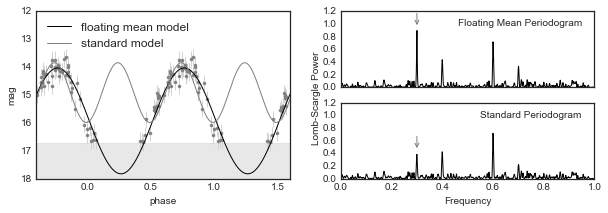

In [5]:
fig = plt.figure(figsize=(10, 3))
gs = plt.GridSpec(2, 2)

# Phased data
ax = fig.add_subplot(gs[:, 0])

ax.fill_between([-1, 2], 18, 16.7, color='lightgray', alpha=0.5)
for offset in (-1, 0, 1):
    ax.errorbar(phase + offset, y, dy, fmt='.',
                   color='gray', ecolor='lightgray', capsize=0)
ax.plot(phase_fit, ls_generalized.model(phase_fit / f0, fmax_generalized),
        color='black', label='floating mean model')
ax.plot(phase_fit, ls_standard.model(phase_fit / f0, fmax_standard),
        color='gray', label='standard model')
ax.legend(loc='upper left')
ax.set(xlim=(-0.4, 1.6),
       ylim=(18, 12),
       xlabel='phase',
       ylabel='mag');

#periodograms
ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(freq, power_generalized, '-', color='black')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
ax1.set(xlim=(0, 1),
        ylim=(0, 1.2))
ax1.text(0.95, 0.9, 'Floating Mean Periodogram',
         ha='right', va='top', transform=ax1.transAxes)
ax1.annotate('', (0.3, 0.95), (0.3, 1.2),
             arrowprops=dict(arrowstyle="->", color='gray'))
        
ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(freq, power_standard, '-', color='black')
ax2.set(xlim=(0, 1),
        ylim=(0, 1.2),
        xlabel='Frequency')
ax2.text(0.95, 0.9, 'Standard Periodogram',
         ha='right', va='top', transform=ax2.transAxes)
ax2.annotate('', (0.3, 0.45), (0.3, 0.7),
             arrowprops=dict(arrowstyle="->", color='gray'))
        
fig.text(0.52, 0.5, 'Lomb-Scargle Power', ha='right', va='center', rotation=90)

fig.savefig('fig20_standard_vs_floatingmean.pdf')